In [27]:
import numpy
from matplotlib import pyplot

In [28]:
pmax = 10.0
umax = 1.0
L = 4
nx = 81
dx = L / (nx - 1)
sigma = 1
dt = sigma * dx / umax
nt = 30

In [61]:
x = numpy.linspace(0.0, L, num=nx)

In [132]:
def ic(x, xL, pL):
    p0 = numpy.zeros_like(x)
    mask = numpy.where((x >= 0.0) & (x < xL))
    p0[mask] = pL * x[mask] / xL
    return p0

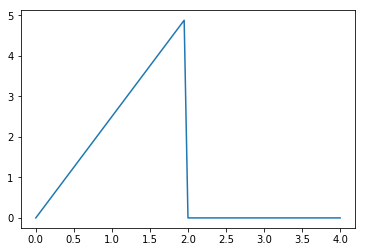

In [133]:
xL = 2.0
pL = 5.0
p0 = ic(x, xL, pL)
pyplot.plot(x, p0);

In [134]:
def velocity(p, pmax, umax):
    u = umax * (1 - (p / pmax))
    return u

In [135]:
def flux(p, pmax, umax):
    F = p * velocity(p, pmax, umax)
    return F

In [136]:
def ftbs(p0, pmax, umax, dt, dx, nt):
    p_hist = [p0.copy()]
    p = p0.copy()
    for n in range(nt):
        F = flux(p, pmax, umax)
        # 1
        p[1:] = p[1:] - dt * (F[1:] - F[:-1]) / dx
        # 2
#        for i in range(1, nt):
#            p[i] = p[i] - dt * (F[i] - F[i-1]) / dx
#            # 3 
#            p[i] = p[i] - dt/dx * (flux(p[i], pmax, umax) -
#                                   flux(p[i - 1], pmax, umax))
        p_hist.append(p.copy())
    return p_hist

In [137]:
p_hist = ftbs(p0, pmax, umax, dt, dx, nt)

In [138]:
def plot(n, x, p_hist):
    pyplot.figure()
    pyplot.title('Time Step: {}'.format(n))
    pyplot.xlabel('Road')
    pyplot.ylabel('Traffic Density')
    pyplot.plot(x, p_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(-0.5, 11.0)
    pyplot.show()

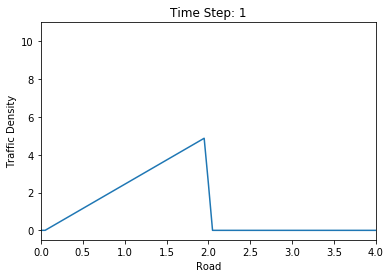

In [140]:
plot(1, x, p_hist)

In [141]:
import ipywidgets

In [142]:
def interactive_plot(x, p_hist):
    nt = len(p_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                    description='Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider,
                               x=ipywidgets.fixed(x),
                              p_hist=ipywidgets.fixed(p_hist))
    return w

In [143]:
interactive_plot(x, p_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…